In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from deap import creator, base, tools, algorithms

In [ ]:
toolbox = base.Toolbox()
n = 5

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("EstrIndividuo", list, fitness=creator.FitnessMin)

toolbox.register("Genes", np.random.permutation, n)
toolbox.register("Individuos", tools.initIterate, creator.EstrIndividuo, toolbox.Genes)

/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'FitnessMin' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)
/usr/local/lib/python3.7/dist-packages/deap/creator.py:141: RuntimeWarning: A class named 'EstrIndividuo' has already been created and it will be overwritten. Consider deleting previous creation of that class or rename it.
  RuntimeWarning)


In [ ]:
toolbox.register("Populacao", tools.initRepeat, list, toolbox.Individuos)

In [ ]:
pop = toolbox.Populacao(n=10)

In [ ]:
toolbox.register("mate", tools.cxPartialyMatched)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=0.1)
toolbox.register("select", tools.selTournament, tournsize=2)

In [ ]:
dist = [[0,	   2.8,	 8.7,	 18.5,	5.8],
        [2.2,	 0,	   6.7,	 18.7,	7.9],
        [7.3,	 6.9,	 0,	   14.5,	12.8],
        [17.8, 14.7, 13.5, 0,	    12],
        [6,	   7.4,	 13.2, 13.9,	0]]

In [ ]:
def aptidao(individuo):
  f = 0
  for i in range(n-1):
    local1 = individuo[i]
    local2 = individuo[i+1]
    distancia = dist[local1][local2]
    f = f + distancia
    
  return f,

In [ ]:
toolbox.register("evaluate", aptidao)

In [ ]:
def estatisticaSalvar(individuo):
  return individuo.fitness.values

In [ ]:
estatistica = tools.Statistics(estatisticaSalvar)
estatistica.register('mean', np.mean)
estatistica.register('min', np.min)
estatistica.register('max', np.max)

In [ ]:
hof = tools.HallOfFame(1)

In [ ]:
result, log = algorithms.eaSimple(pop,
                                  toolbox,
                                  cxpb=0.8,
                                  mutpb=0.1,
                                  stats=estatistica,
                                  ngen=50,
                                  halloffame=hof,
                                  verbose=True)

gen	nevals	mean	min 	max 
0  	0     	27.5	27.5	27.5
1  	7     	27.5	27.5	27.5
2  	7     	27.5	27.5	27.5
3  	10    	27.5	27.5	27.5
4  	8     	27.5	27.5	27.5
5  	6     	27.5	27.5	27.5
6  	10    	29.89	27.5	41.2
7  	8     	30.36	27.5	45.9
8  	9     	27.78	27.5	30.3
9  	10    	28.11	27.5	33.6
10 	10    	27.5 	27.5	27.5
11 	6     	27.5 	27.5	27.5
12 	8     	27.5 	27.5	27.5
13 	6     	27.5 	27.5	27.5
14 	8     	27.5 	27.5	27.5
15 	8     	27.5 	27.5	27.5
16 	8     	27.5 	27.5	27.5
17 	10    	27.5 	27.5	27.5
18 	10    	27.5 	27.5	27.5
19 	6     	27.5 	27.5	27.5
20 	10    	27.5 	27.5	27.5
21 	10    	27.9 	27.5	31.5
22 	10    	27.5 	27.5	27.5
23 	8     	27.5 	27.5	27.5
24 	8     	27.5 	27.5	27.5
25 	8     	27.5 	27.5	27.5
26 	8     	27.5 	27.5	27.5
27 	8     	27.5 	27.5	27.5
28 	8     	28.78	27.5	40.3
29 	8     	27.5 	27.5	27.5
30 	6     	28.86	27.5	41.1
31 	9     	27.9 	27.5	31.5
32 	8     	27.5 	27.5	27.5
33 	10    	29.71	27.5	41.2
34 	7     	27.5 	27.5	27.5
35 	6     	27.5 	27.5	27.5
36 	8   

In [ ]:
print(result)

[[3, 4, 0, 1, 2], [3, 4, 0, 1, 2], [3, 4, 0, 1, 2], [3, 4, 0, 1, 2], [3, 4, 0, 1, 2], [3, 4, 0, 1, 2], [3, 4, 0, 1, 2], [3, 4, 0, 1, 2], [3, 4, 0, 1, 2], [3, 4, 0, 1, 2]]


In [ ]:
print(hof)

[[3, 4, 0, 1, 2]]


In [ ]:
melhor = hof[0]
print(aptidao(melhor))

(27.5,)


In [ ]:
log

[{'gen': 0, 'nevals': 0, 'mean': 28.339999999999996, 'min': 27.5, 'max': 35.9},
 {'gen': 1, 'nevals': 10, 'mean': 27.5, 'min': 27.5, 'max': 27.5},
 {'gen': 2, 'nevals': 10, 'mean': 28.78, 'min': 27.5, 'max': 40.3},
 {'gen': 3, 'nevals': 7, 'mean': 27.5, 'min': 27.5, 'max': 27.5},
 {'gen': 4, 'nevals': 7, 'mean': 27.5, 'min': 27.5, 'max': 27.5},
 {'gen': 5, 'nevals': 8, 'mean': 28.339999999999996, 'min': 27.5, 'max': 35.9},
 {'gen': 6, 'nevals': 10, 'mean': 27.5, 'min': 27.5, 'max': 27.5},
 {'gen': 7, 'nevals': 8, 'mean': 28.51, 'min': 27.5, 'max': 33.6},
 {'gen': 8, 'nevals': 8, 'mean': 29.74, 'min': 27.5, 'max': 45.9},
 {'gen': 9, 'nevals': 6, 'mean': 27.9, 'min': 27.5, 'max': 31.5},
 {'gen': 10,
  'nevals': 9,
  'mean': 29.339999999999996,
  'min': 27.5,
  'max': 45.9},
 {'gen': 11, 'nevals': 8, 'mean': 27.5, 'min': 27.5, 'max': 27.5},
 {'gen': 12, 'nevals': 10, 'mean': 27.5, 'min': 27.5, 'max': 27.5},
 {'gen': 13, 'nevals': 7, 'mean': 27.5, 'min': 27.5, 'max': 27.5},
 {'gen': 14, 'n

In [ ]:
menores =  log.select('min')
maiores =  log.select('max')
media =  log.select('mean')

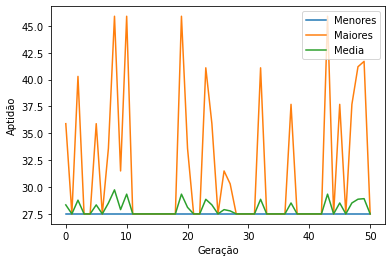

In [ ]:
plt.plot(menores, label="Menores")
plt.plot(maiores, label="Maiores")
plt.plot(media, label="Media")
plt.xlabel("Geração")
plt.ylabel("Aptidão")
plt.legend(loc=1)